<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/Week1/TugasWeek1_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset from CSV
url = "https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/Week1/HeartDisease.csv"
df = pd.read_csv(url)
display(df.head())
print(df.shape)
df.info()
print("Jumlah data kosong : ")
print(df.isnull().sum())
print("Jumlah data duplikat : ",df.duplicated().sum())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
Jumlah data kosong : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num  

In [ ]:
df.fillna(df.median(), inplace=True)
print("Jumlah data kosong : ")
print(df.isnull().sum())
print("Jumlah data duplikat : ",df.duplicated().sum())

Jumlah data kosong : 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Jumlah data duplikat :  0


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('num', axis=1)
y = df['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
logreg.fit(X_train, y_train)

# Make predictions on the scaled test data
y_pred = logreg.predict(X_test)

Accuracy: 0.6065573770491803
Precision: 0.5617190961453256
Recall: 0.6065573770491803
F1-score: 0.5821233411397346
AUC: 0.7977553532036291
Confusion Matrix:
[[29  3  1  0  0]
 [ 6  4  1  0  0]
 [ 2  1  1  3  0]
 [ 0  1  2  3  1]
 [ 0  2  0  1  0]]


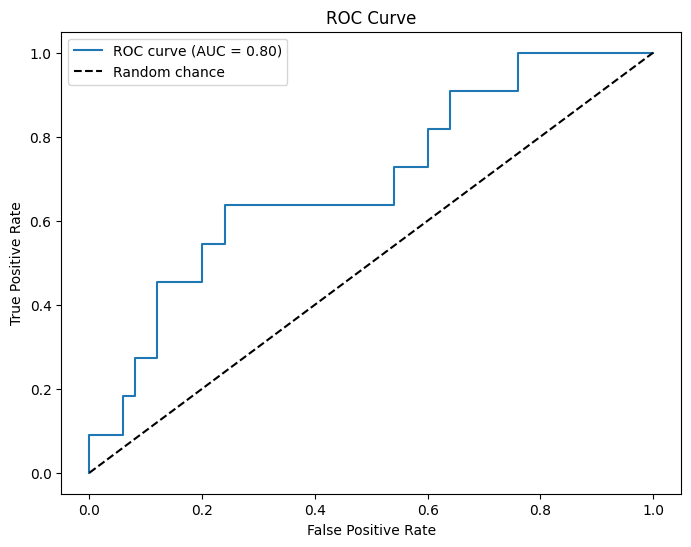

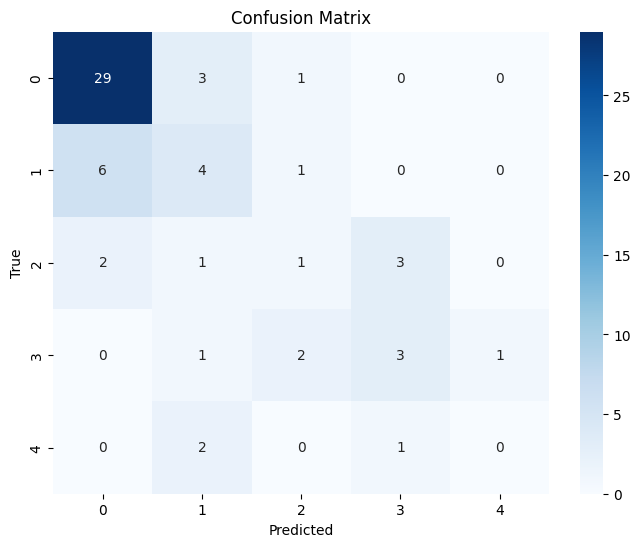

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
auc = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1], pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Berikut penjelasan untuk semua persamaan matematika yang digunakan dalam evaluasi model klasifikasi logistik:

## 1. Akurasi (Accuracy)
**Rumus**: $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

**Penjelasan**: Akurasi mengukur proporsi prediksi yang benar dibandingkan dengan jumlah total prediksi. Ini dihitung dengan membagi jumlah prediksi benar (True Positive + True Negative) dengan jumlah total prediksi.

## 2. Presisi (Precision)
**Rumus**: $\text{Precision} = \frac{TP}{TP + FP}$

**Penjelasan**: Presisi mengukur proporsi hasil positif yang diidentifikasi dengan benar dibandingkan dengan semua hasil positif yang diprediksi. Ini mengukur seberapa "tepat" model dalam memprediksi kelas positif.

## 3. Recall (Sensitivitas)
**Rumus**: $\text{Recall} = \frac{TP}{TP + FN}$

**Penjelasan**: Recall mengukur proporsi hasil positif aktual yang diidentifikasi dengan benar. Ini mengukur kemampuan model untuk menemukan semua contoh positif.

## 4. F1-Score
**Rumus**: $\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

**Penjelasan**: F1-Score adalah rata-rata harmonik dari presisi dan recall. Ini memberikan keseimbangan antara presisi dan recall, yang penting ketika distribusi kelas tidak seimbang.

## 5. ROC (Receiver Operating Characteristic)
**Penjelasan**: ROC adalah grafik yang menunjukkan kinerja klasifikasi model pada semua ambang batas klasifikasi. Grafik ini dibuat dengan memplot:
- True Positive Rate (TPR) atau Recall: $TPR = \frac{TP}{TP + FN}$
- False Positive Rate (FPR): $FPR = \frac{FP}{FP + TN}$

## 6. AUC (Area Under the ROC Curve)
**Rumus**: AUC = ∫ ROC Curve

**Penjelasan**: AUC mengukur seluruh area dua dimensi di bawah kurva ROC. Ini dapat diinterpretasikan sebagai probabilitas bahwa model akan memberi peringkat contoh positif acak lebih tinggi daripada contoh negatif acak. Nilai berkisar dari 0 hingga 1, dengan 0.5 mewakili model acak dan 1 mewakili model sempurna.

## 7. Multi-class ROC dan AUC
Untuk kasus multi-kelas, kita menggunakan pendekatan "One-vs-Rest" (OvR):

**Micro-average AUC**:
- Menggabungkan hasil dari semua kelas dan kemudian menghitung metrik secara keseluruhan.
- $\text{AUC}_{\text{micro}} = \text{AUC}\left( \bigcup_{i=1}^{n} y_i, \bigcup_{i=1}^{n} \hat{p}_i \right)$

**Macro-average AUC**:
- Menghitung metrik untuk setiap kelas secara individual dan kemudian mengambil rata-rata.
- $\text{AUC}_{\text{macro}} = \frac{1}{n} \sum_{i=1}^{n} \text{AUC}_i$

## 8. Regresi Logistik
**Rumus**: $P(y=1|x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}$

**Penjelasan**: Dalam regresi logistik, kita menggunakan fungsi logistik (sigmoid) untuk memodelkan probabilitas bahwa suatu instance termasuk dalam kelas positif. Koefisien βᵢ menunjukkan pentingnya fitur xᵢ dalam memprediksi hasil.

## 9. Matriks Konfusi
Matriks konfusi menampilkan empat nilai utama:
- True Positive (TP): Kasus positif yang diprediksi dengan benar
- False Positive (FP): Kasus negatif yang salah diprediksi sebagai positif
- True Negative (TN): Kasus negatif yang diprediksi dengan benar
- False Negative (FN): Kasus positif yang salah diprediksi sebagai negatif

Untuk kasus multi-kelas, matriks konfusi berukuran n×n, di mana n adalah jumlah kelas.

## 10. Weighted Average untuk Metrics Multi-kelas
Saat menggunakan `average='weighted'` dalam fungsi scikit-learn:

**Rumus**: $\text{Metric}_{\text{weighted}} = \sum_{i=1}^{n} w_i \times \text{Metric}_i$

**Penjelasan**: Metrik (presisi, recall, F1) dihitung untuk setiap kelas dan kemudian dirata-ratakan dengan pembobotan sesuai dengan jumlah instance sebenarnya di kelas tersebut, di mana wᵢ adalah proporsi instances dari kelas i.

Semua metrik evaluasi ini bekerja sama untuk memberikan gambaran komprehensif tentang kinerja model klasifikasi logistik Anda.